<a href="https://colab.research.google.com/github/joshIsac/quantumcomputing/blob/main/2348523_Teleportation_protocol_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teleportation Protocol
The objective of this technique is to transmit one qubit between Alice and Bob by sending two classical bits. However, Alice and Bob must initially share one entangled state.

in simple it is process by which the quantum state of one particle can be transmitted to anpther particle at any distant location which is only achieved through entanglement

In [90]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_histogram

In [94]:
# Quantum Registers
Q = QuantumRegister(1, "Q")  #  qubit to be teleported
A = QuantumRegister(1, "A")  # Alice's entangled qubit
B = QuantumRegister(1, "B")  # Bob's entangled qubit
a = ClassicalRegister(1, "a")  # Alice's first classical bit
b = ClassicalRegister(1, "b")  # Alice's second classical bit


### 1. **Quantum Registers and Classical Registers**:
- **Quantum Registers**:
  1. `Q`: The qubit whose quantum state will be teleported.
  2. `A`: Alice's part of the entangled EPR pair.
  3. `B`: Bob's part of the entangled EPR pair that will hold the teleported state.
  
- **Classical Registers**:
  - Two classical registers store Alice's measurement results, which are sent to Bob for corrections.

In [95]:
#quantum circuit to teleportation
teleport=QuantumCircuit(Q,A,B,a,b)

In [96]:
#entanglement 
teleport.h(A)
teleport.cx(A,B) #CNOT gate to entangle Alice's and Bob's qubits
teleport.barrier()

# Alice applies gates and measures
teleport.cx(Q,A)  # CNOT between the teleport qubit and Alice's qubit
teleport.h(Q)  # Hadamard operation on teleport qubit to complete Bell measurement
teleport.barrier() # Barrier operation on teleport qubit

# Alice measures her qubits and sends classical bits to Bob
teleport.measure(A,a)
teleport.measure(Q,b)
teleport.barrier()

# Bob applies corrections based on Alice's classical bits
with teleport.if_test((a, 1)):
    teleport.x(B)
with teleport.if_test((b, 1)):
    teleport.z(B)


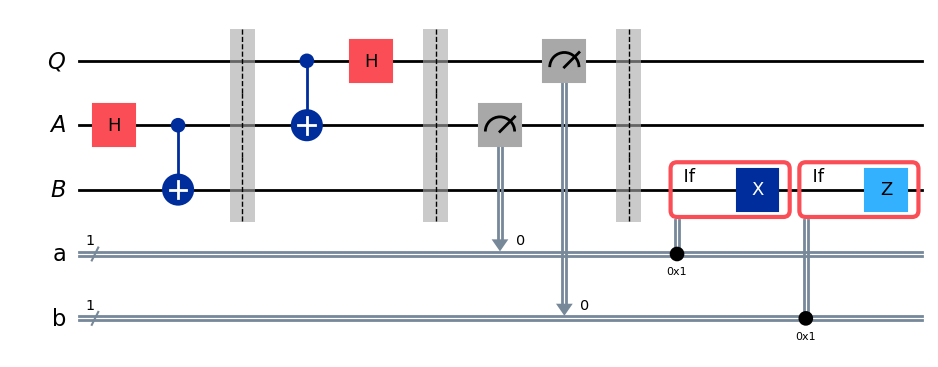

In [97]:
display(teleport.draw("mpl"))

In [110]:
# random unitary gate to teleport qubit (initial state) before teleportation
from qiskit.circuit.library import UGate
import random
from numpy import pi

random_unitary_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_unitary_gate.to_matrix())  # random gate matrix


array([[-0.22893791+0.j        ,  0.80219503+0.55142594j],
       [ 0.91903458-0.3208783j ,  0.22086799+0.06024861j]])

**Random Unitary Gate**: A random unitary gate is applied to the teleport qubit before teleportation. The unitary gate is parameterized by three angles $ \theta $, $ \phi $, and $ \lambda $, which define a general unitary transformation as:
  $$
  U(\theta, \phi, \lambda) = \begin{pmatrix}
  \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
  e^{i\phi}\sin(\theta/2) & e^{i(\phi + \lambda)}\cos(\theta/2)
  \end{pmatrix}
  $$
  This random gate transforms the initial state $ Q $ into a new state, which will be teleported to Bob.



In [111]:
#create s new circuit to test random state vector
testcircuit=QuantumCircuit(Q,A,B,a,b)



In [112]:
# random gate to the teleport qubit to create a new state to teleport
testcircuit.append(random_unitary_gate, Q)
testcircuit.barrier()

# Teleportation protocol
testcircuit = testcircuit.compose(teleport)
testcircuit.barrier()

# After teleportation, applying inverse of the random gate to Bob's qubit to verify teleportation
testcircuit.append(random_unitary_gate.inverse(), B)

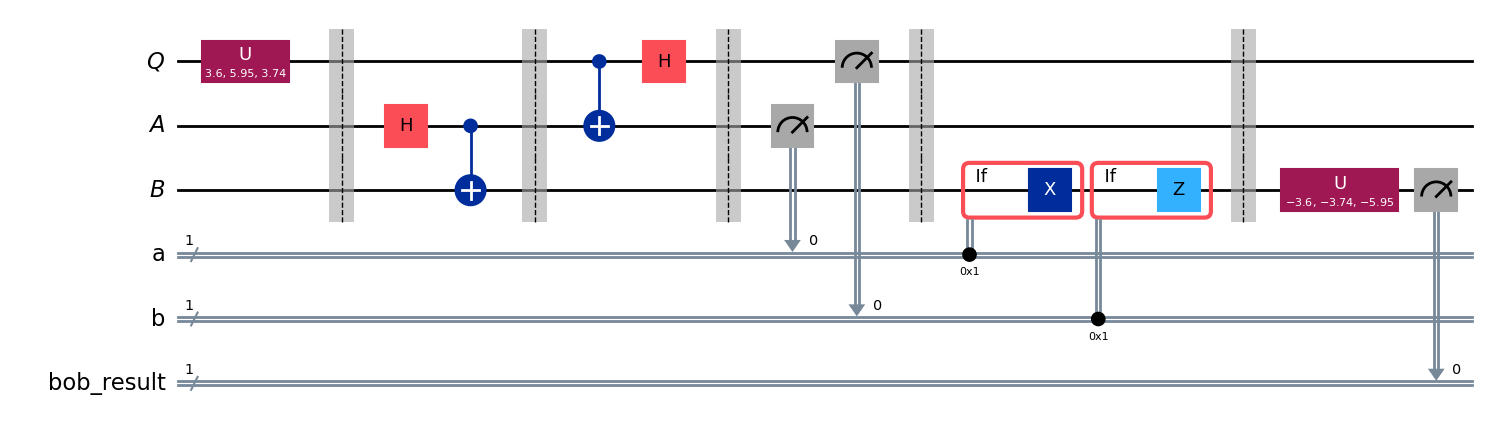

In [113]:
# measuring Bob's qubit which should hold the teleported state
bob_result = ClassicalRegister(1, "bob_result")
testcircuit.add_register(bob_result)
testcircuit.measure(B, bob_result)

# full test circuit
display(testcircuit.draw(output='mpl'))


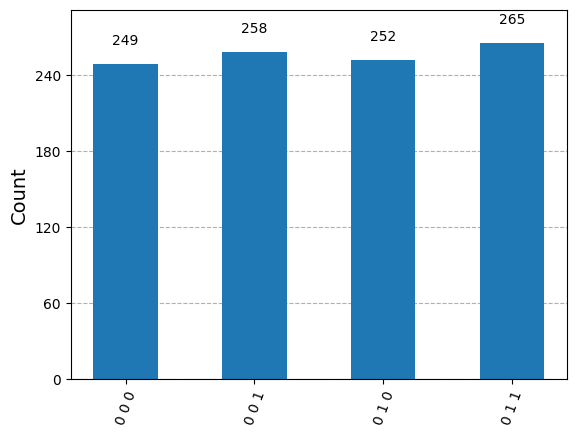

In [114]:
from qiskit_aer import AerSimulator
# Execute the test on the AerSimulator
simulator = AerSimulator()
result = simulator.run(testcircuit).result()
statistics = result.get_counts()

# Display the measurement statistics
display(plot_histogram(statistics))


Applying teleportation protocol to different state vectors

Results for state vector [1, 0]:


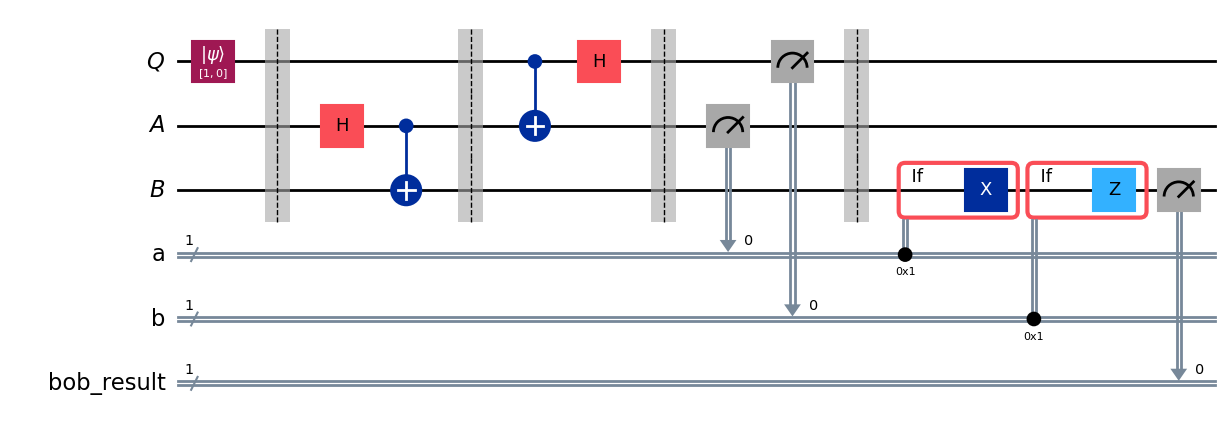

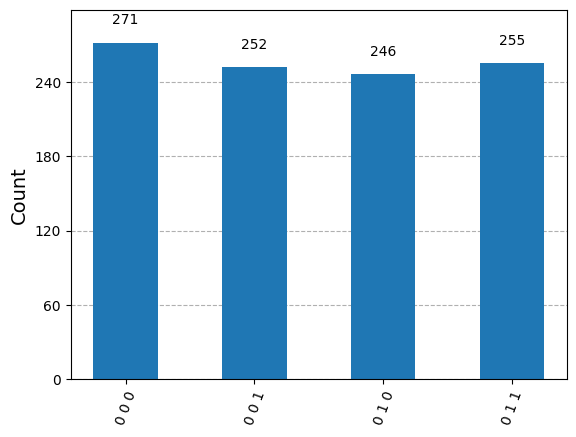

Results for state vector [0, 1]:


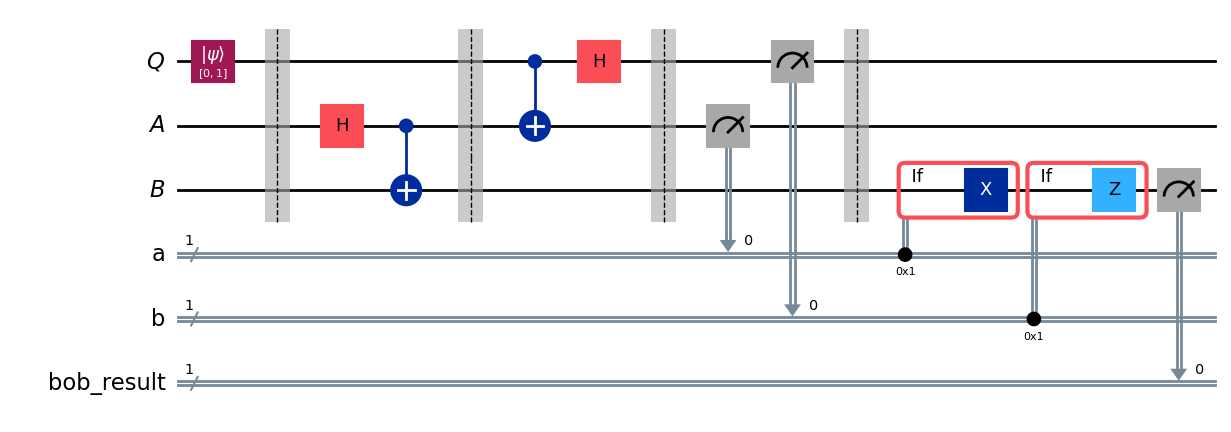

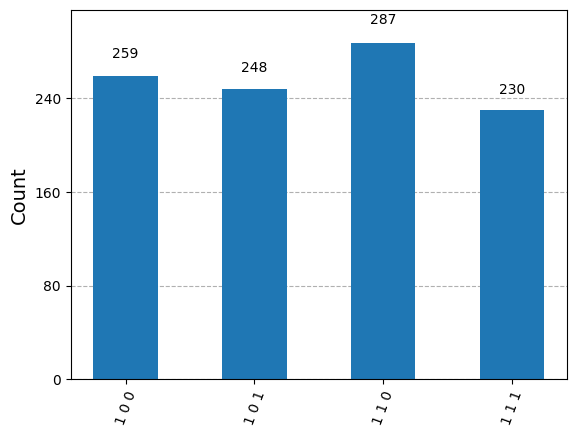

Results for state vector [0.7071067811865475, 0.7071067811865475]:


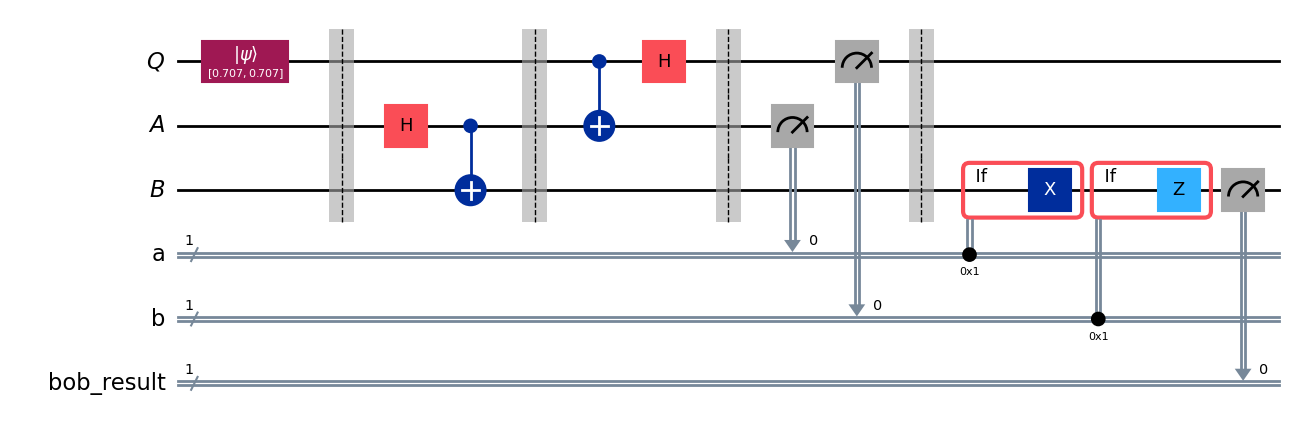

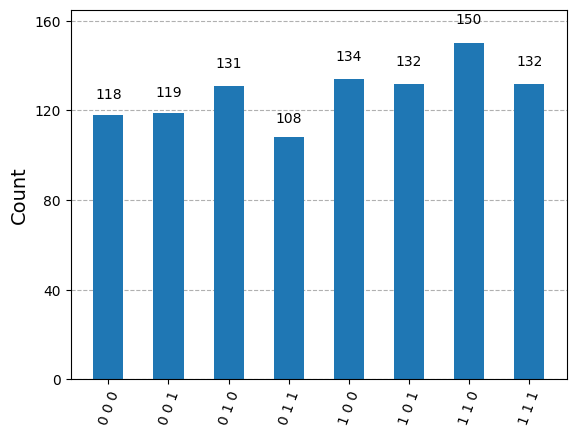

Results for state vector [0.7071067811865475, -0.7071067811865475]:


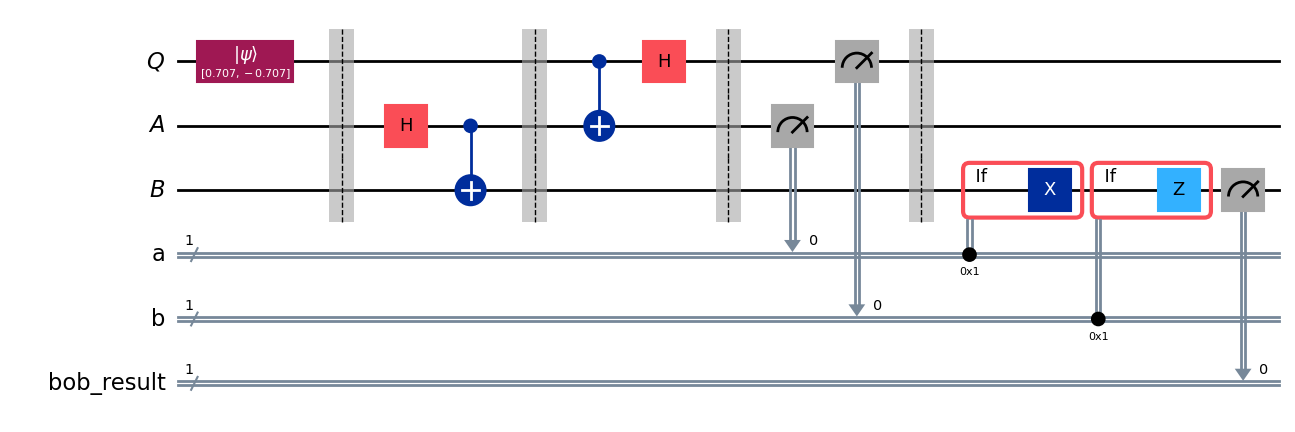

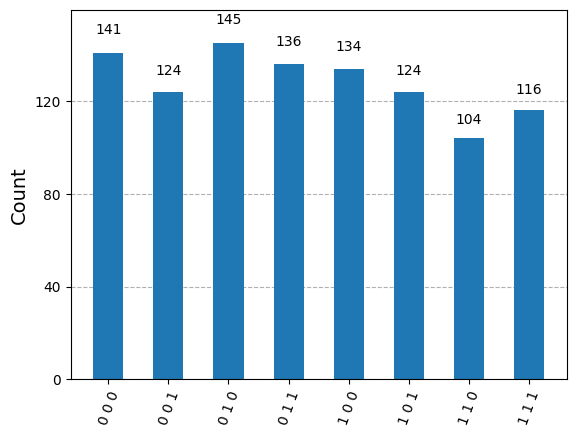

In [118]:
#Applying teleportation protocol to different state vectors
#We will apply the teleportation protocol to the following state vectors
state_vectors = [[1,0],[0,1],[1/2**0.5, 1/2**0.5],[1/2**0.5, -1/2**0.5]]  # |1⟩ state , |+⟩Superposition state
#We will apply the teleportation protocol to the state vectors
for state in state_vectors:
    # Create a new circuit for each state vector
    test_circuit = QuantumCircuit(Q, A,B, a,b)
    test_circuit.initialize(state, Q)  # Initialize teleport_qubit with the state vector
    test_circuit.barrier()
    
    # Apply the teleportation protocol
    fullcircuit = test_circuit.compose(teleport)
    
    # Add a classical register to measure Bob's final state
    bob_result = ClassicalRegister(1, "bob_result")
    fullcircuit.add_register(bob_result)
    fullcircuit.measure(B, bob_result)

    # Simulate the circuit
    result = simulator.run(fullcircuit).result()
    statistics = result.get_counts()

    # Display the circuit and measurement results
    print(f"Results for state vector {state}:")
    display(fullcircuit.draw(output='mpl'))
    display(plot_histogram(statistics))